In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [24]:
os.listdir('./train')

['Moderate', 'Proliferate_DR', 'No_DR', 'Severe', 'Mild']

In [25]:
os.listdir(os.path.join('train', 'Mild'))

['fd62bd0db4f1.png',
 'b576c5269ad1.png',
 'b22354b5f94b.png',
 'ead23cc922ed.png',
 '8dc22e65c06f.png',
 'e96bd80a8a53.png',
 '107aea0d9289.png',
 'a443c4fd489c.png',
 '0a3202889f4d.png',
 '99132193eaa0.png',
 'c4a8f2fcf6e8.png',
 '4e6071b73120.png',
 '2d9d97a6e713.png',
 '6165081b9021.png',
 '7335a2d43ada.png',
 '76be29bb30b2.png',
 'f6f7dba7104d.png',
 '4dd9d29eae5d.png',
 '67f5d89da548.png',
 'e9ff9352ccb3.png',
 'f47a2a4a0411.png',
 'ad1f7445b1a8.png',
 '4e82c3c8d31f.png',
 '1116271db4ea.png',
 '821789e9053f.png',
 '19722bff5a09.png',
 '513b0a4651fa.png',
 'c96f743915b5.png',
 '51131b48f9d4.png',
 '3f73c91b7e32.png',
 'a32886cb31ab.png',
 '531b39880c32.png',
 '4ef7144e24ff.png',
 '80d24897669f.png',
 '2ecbc2e3f239.png',
 '545df1bbcd61.png',
 'bd269a1f0e4d.png',
 '01b3aed3ed4c.png',
 'd66ccb75ada1.png',
 'b4f41b5bf0ef.png',
 '7347f5133a6a.png',
 'a8c950a99107.png',
 '24b943fe725e.png',
 'ef8109305128.png',
 'bb783d8e496f.png',
 '9a3109657ac1.png',
 '944a233fbf8e.png',
 'b9b99dad668

In [26]:
train = []
label = []

for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 3662 



In [27]:
train

['train/Moderate/d29096bd94aa.png',
 'train/Moderate/1968183f0e61.png',
 'train/Moderate/5dc23e440de3.png',
 'train/Moderate/032d7b0b4bf6.png',
 'train/Moderate/d28bd830c171.png',
 'train/Moderate/0fffa73e2402.png',
 'train/Moderate/6e68e742f5bc.png',
 'train/Moderate/d41b33fcb94f.png',
 'train/Moderate/291e2ff3d834.png',
 'train/Moderate/89d2a7403a06.png',
 'train/Moderate/c568e5245ea5.png',
 'train/Moderate/4b5ffea77373.png',
 'train/Moderate/de50dfa745f8.png',
 'train/Moderate/9837048b85dc.png',
 'train/Moderate/28824d12d31d.png',
 'train/Moderate/aa31bc6b8f4d.png',
 'train/Moderate/731b19a460ad.png',
 'train/Moderate/44c869174e3a.png',
 'train/Moderate/ee02294cc3d9.png',
 'train/Moderate/76e6a9238570.png',
 'train/Moderate/c70d09370109.png',
 'train/Moderate/94dcb491143f.png',
 'train/Moderate/d9bbdc33db83.png',
 'train/Moderate/1ee1eb7943db.png',
 'train/Moderate/77e7c7a160c8.png',
 'train/Moderate/70f5caf5f305.png',
 'train/Moderate/62e6f814c8f5.png',
 'train/Moderate/ba262488359

In [28]:
label

['Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',

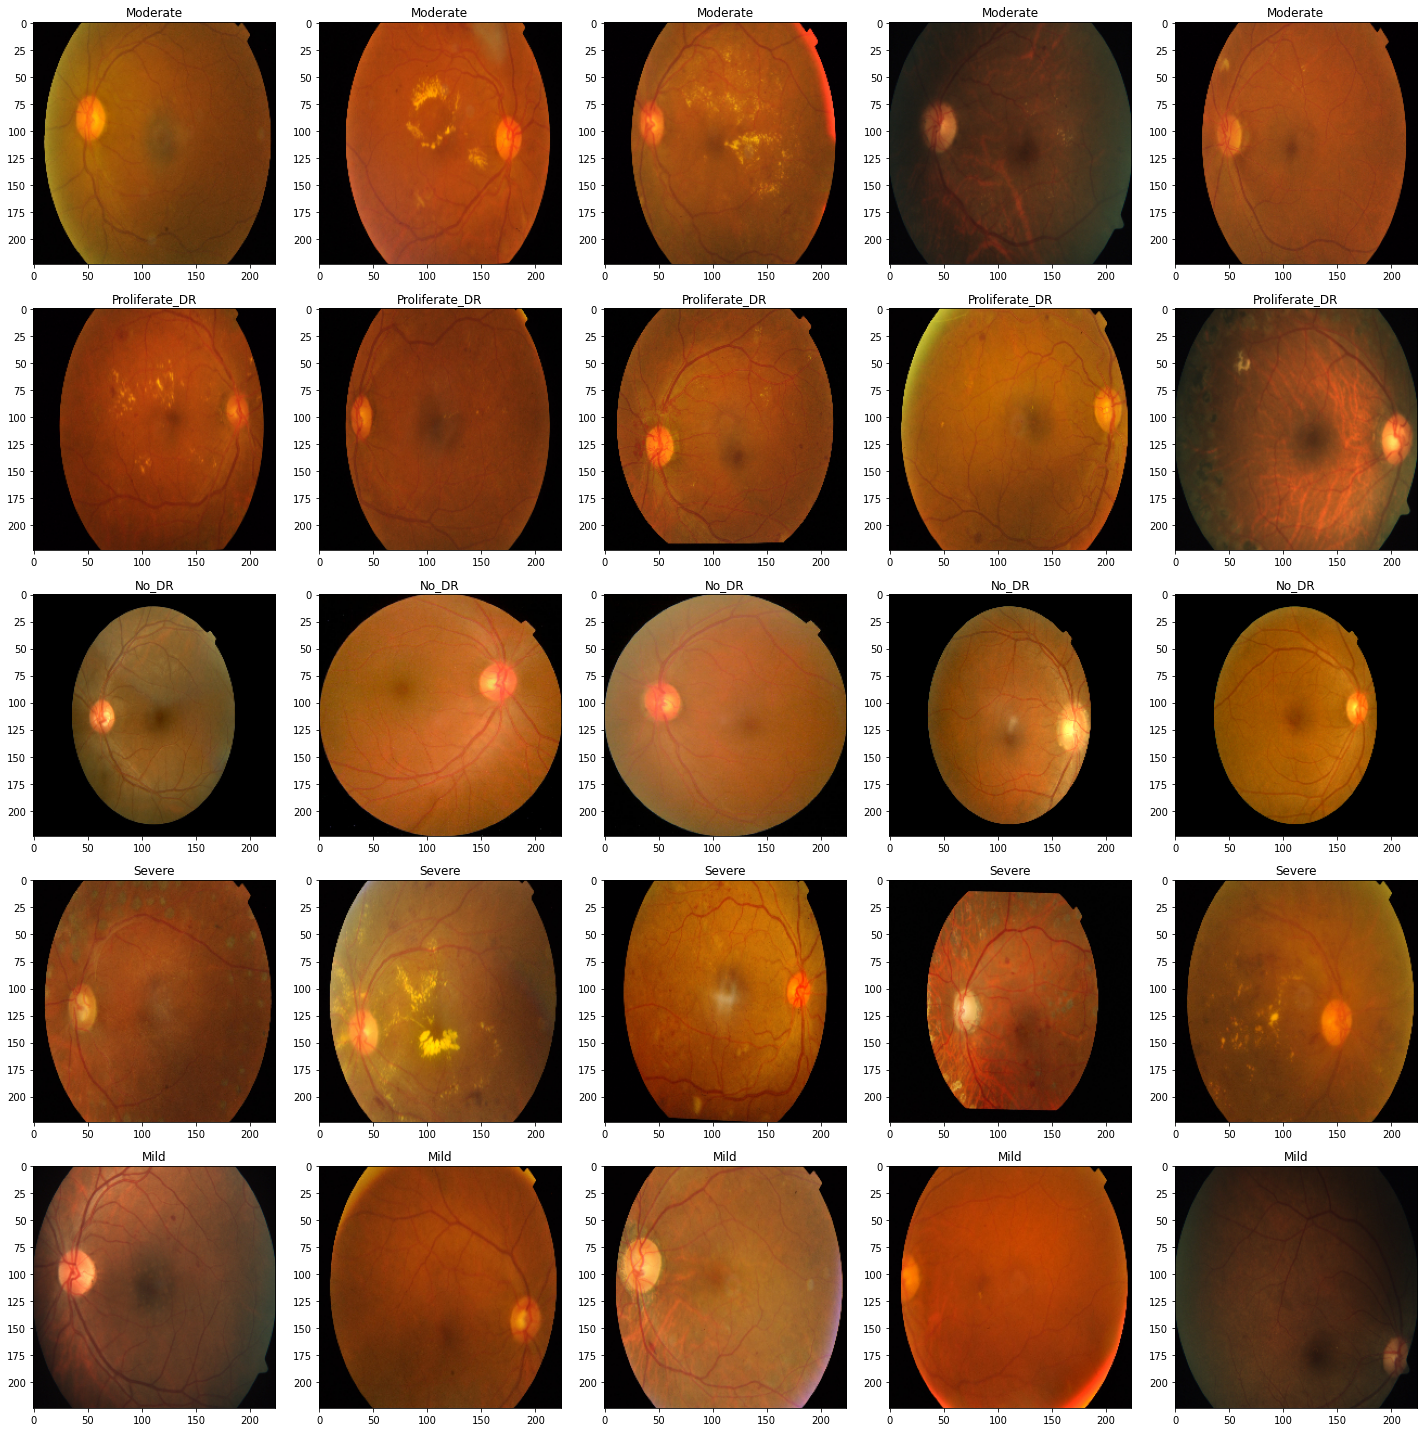

In [29]:
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [30]:
No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Moderate = 999 

Number of images in Proliferate_DR = 295 

Number of images in No_DR = 1805 

Number of images in Severe = 193 

Number of images in Mild = 370 



In [31]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image    Labels
0     train/Moderate/d29096bd94aa.png  Moderate
1     train/Moderate/1968183f0e61.png  Moderate
2     train/Moderate/5dc23e440de3.png  Moderate
3     train/Moderate/032d7b0b4bf6.png  Moderate
4     train/Moderate/d28bd830c171.png  Moderate
...                               ...       ...
3657      train/Mild/0fb1053285cf.png      Mild
3658      train/Mild/71c1a3cdbe47.png      Mild
3659      train/Mild/33b893e18eb3.png      Mild
3660      train/Mild/a8582e346df0.png      Mild
3661      train/Mild/eeb231c3ef1f.png      Mild

[3662 rows x 2 columns]

In [32]:
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [33]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [35]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [36]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')
model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [37]:
help(model.summary)

Help on method summary in module tensorflow.python.keras.engine.training:

summary(line_length=None, positions=None, print_fn=None) method of tensorflow.python.keras.engine.functional.Functional instance
    Prints a string summary of the network.
    
    Arguments:
        line_length: Total length of printed lines
            (e.g. set this to adapt the display to different
            terminal window sizes).
        positions: Relative or absolute positions of log elements
            in each line. If not provided,
            defaults to `[.33, .55, .67, 1.]`.
        print_fn: Print function to use. Defaults to `print`.
            It will be called on each line of the summary.
            You can set it to a custom function
            in order to capture the string summary.
    
    Raises:
        ValueError: if `summary()` is called before the model is built.



In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [39]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [40]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 1, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

77/77 [==============================] - ETA: 0s - loss: 1.7441 - accuracy: 0.6497
Epoch 00001: val_loss improved from inf to 1.65709, saving model to weights.hdf5
77/77 [==============================] - 240s 3s/step - loss: 1.7441 - accuracy: 0.6497 - val_loss: 1.6571 - val_accuracy: 0.2933


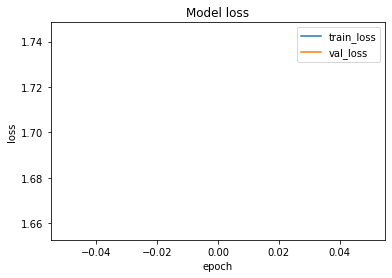

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


In [42]:
model.load_weights("retina_weights.hdf5")

In [43]:
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 12s 532ms/step - loss: 0.5012 - accuracy: 0.8395
Accuracy Test : 0.8394886255264282


In [44]:
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  img= PIL.Image.open(test['Image'].tolist()[item])
  img = img.resize((256,256))
  image.append(img)
  img = np.asarray(img, dtype= np.float32)
  img = img / 255
  img = img.reshape(-1,256,256,3)
  predict = model.predict(img)
  predict = np.argmax(predict)
  prediction.append(labels[predict])
  original.append(test['Labels'].tolist()[item])


In [46]:
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8376534788540245


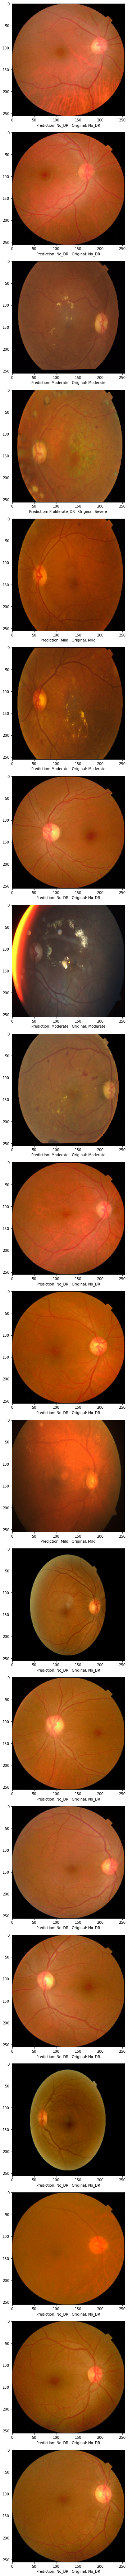

In [47]:
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

/home/prajwal/VirtualENV/deeplearning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

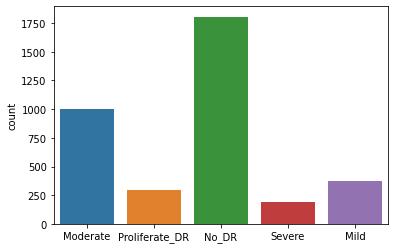

In [48]:
sns.countplot(label)

<function matplotlib.pyplot.show(close=None, block=None)>

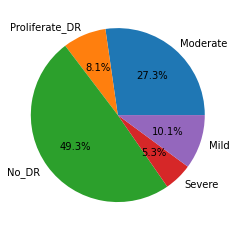

In [49]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [50]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [51]:
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.87      0.56      0.68        86
      Moderate       0.70      0.85      0.77       186
         No_DR       0.96      0.98      0.97       361
Proliferate_DR       0.64      0.64      0.64        55
        Severe       0.71      0.44      0.55        45

      accuracy                           0.84       733
     macro avg       0.78      0.69      0.72       733
  weighted avg       0.84      0.84      0.83       733



Text(0.5, 1.0, 'Confusion_matrix')

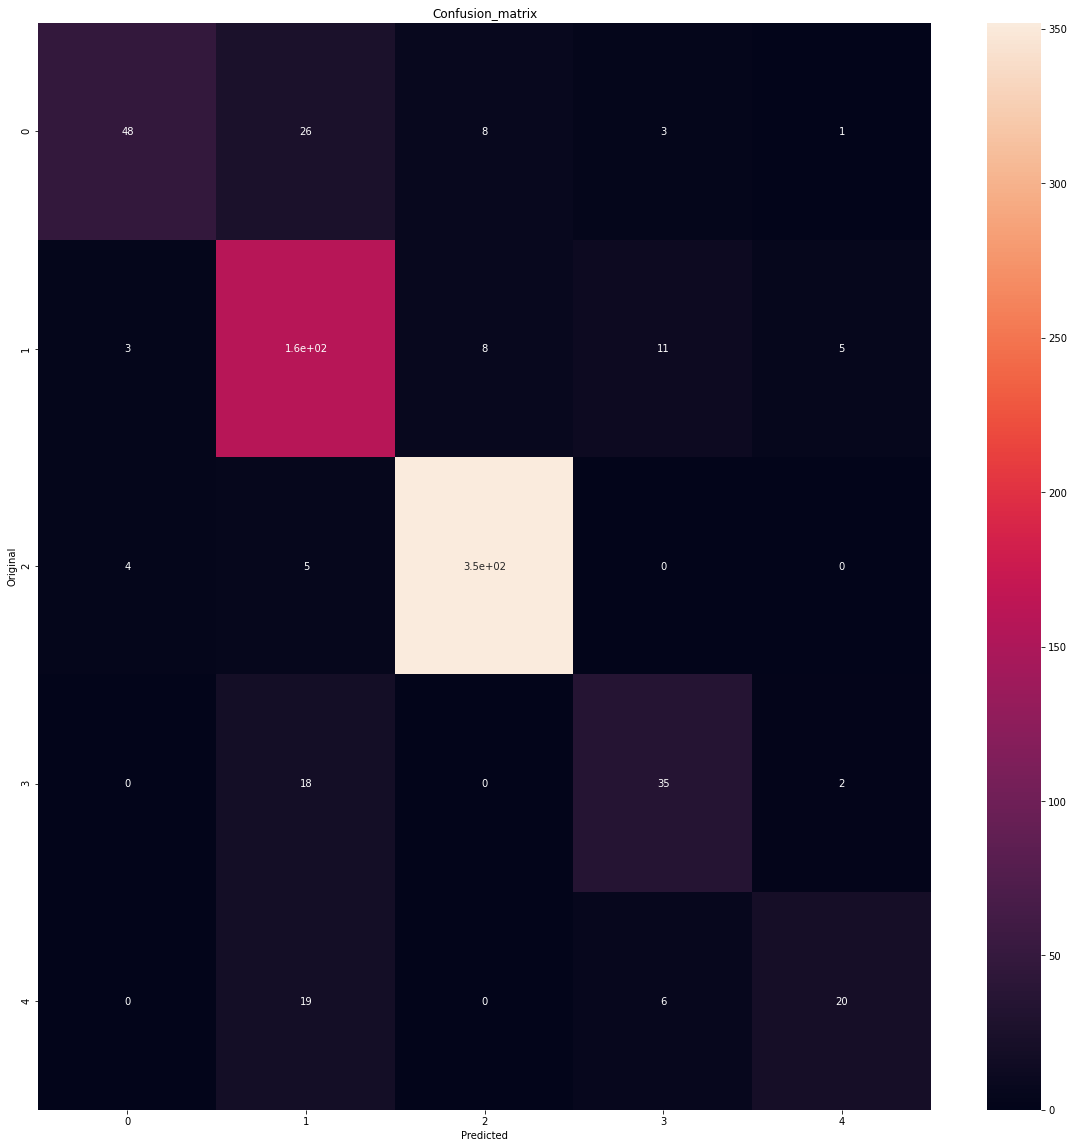

In [52]:
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
